In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

import sklearn as sk
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics


In [6]:
faces = fetch_olivetti_faces()

In [11]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [18]:
#faces.data and faces.shape contain the same 64*64, except that faces.data contains it as a 1-tensor 
#and faces.images contains it as a 2-tensor
print(faces.data.shape)
print(faces.images.shape)
print(faces.target.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)


In [24]:
print(np.min(faces.data), np.max(faces.data), np.mean(faces.data))

0.0 1.0 0.5470426


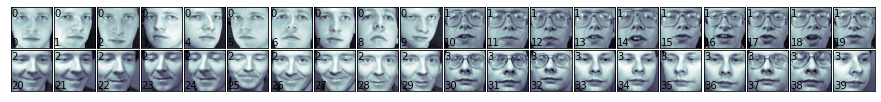

In [37]:
def print_images(images, target, top_n):
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top =1, hspace = 0.05, wspace = 0.05)
    for i in range(top_n):
        p = fig.add_subplot(20,20, i+1, xticks=[], yticks=[])
        p.imshow(images[i],cmap = plt.cm.bone)
        p.text(0,14, str(target[i]))
        p.text(0,60, str(i))
print_images(faces.images, faces.target, 40)

In [68]:
svc_1 = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)

In [80]:
def evaluate_cross_validation(clf, X,y,k):
    cv = KFold(n_splits=5,shuffle=True, random_state=0)
    scores = cross_val_score(clf, X,y, cv=cv)
    print(scores)
    print("Mean score {0:.3f} (+/-) {1:.3f}".format(np.mean(scores), sem(scores)))
evaluate_cross_validation(svc_1, X_train, y_train,5)

[0.93333333 0.86666667 0.91666667 0.93333333 0.91666667]
Mean score 0.913 (+/-) 0.012


In [87]:
def train_and_evaluate(clf, X_train,y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    print("Accuracy on Training Set:")
    print(clf.score(X_train, y_train))
    print("Accuracy on Test Set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))
    return metrics.confusion_matrix(y_test, y_pred)
conf=train_and_evaluate(svc_1, X_train, y_train, X_test, y_test)

Accuracy on Training Set:
1.0
Accuracy on Test Set:
0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
 

# Glasses or No?

In [106]:
#By manual inspection, we find that the following index ranges are of people wearing glassees
glasses = [(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
      (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
      (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
      (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
      (330, 339), (358, 359), (360, 369)]

def create_target(segments):
    y = np.zeros(faces.target.shape[0])
    for start, end in segments:
        y[start: end+1] = 1
    return y
target_glasses = create_target(glasses)


X_train, X_test, y_train, y_test = train_test_split(faces.data, target_glasses, test_size=0.25, random_state=0)

In [107]:
sv_2 = SVC(kernel='linear')
sv_2.fit(X_train, y_train)
evaluate_cross_validation(sv_2, X_train, y_train, 5)

[1.         0.95       0.98333333 0.98333333 0.93333333]
Mean score 0.970 (+/-) 0.012


In [108]:
train_and_evaluate(sv_2,X_train,y_train, X_test, y_test)

Accuracy on Training Set:
1.0
Accuracy on Test Set:
0.99
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        67
         1.0       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

[[66  1]
 [ 0 33]]


array([[66,  1],
       [ 0, 33]])